<h1>Exploring the Titanic Dataset</h1>
<p>For this assignment I analyzed the dataset about the passengers of the Titanic.</p>
<p>After exploring what variables I had to work with I posed 30+ questions. I’ve rearranged and grouped them into sets to tell a more coherent story.</p>
<p>The major sections:</p>
<ul>
<li>Importing and Cleaning Data</li>
<li>General Descriptive Information</li>
<li>What factors influenced survival?</li>
<li>Fares and Miscellaneous</li>
</ul>

<p>In most places I have cleaned up my exploration to make it more readable, but in some sections I've left the iterative process I followed intact.</p> 
<p>I used many sources for pandas syntax, but I found <a href="https://github.com/jvns/pandas-cookbook">Julia Evans’ pandas Cookbook</a>, Wes McKinney’s excellent book <a href="https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793">Python for Data Analysis</a>, and Stack Overflow particularly helpful in addition to pandas' own documentation.</p>

<p>On the 10th of April, 1912, the RMS Titanic set off on its maiden voyage. I think it’s important to keep in mind that these are people, not just interesting numbers. While exploring this data I was constantly reminded of the hundreds of tragic stories contained in this data.</p> 

<blockquote>"I cannot imagine any condition which would cause a ship to founder. I cannot conceive of any vital disaster happening to this vessel. Modern ship building has gone beyond that." -Captain Smith, Commander of Titanic</blockquote>

In [2]:
#import numpy and pandas
import numpy as np
import pandas as pd

In [3]:
#Make charts display inline.
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
#Change chart style
plt.style.use('fivethirtyeight')

<h2>Importing and Cleaning the Data</h2>

In [6]:
#Read in titanic data
data = pd.read_csv("titanic_data.csv")

In [7]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
#First, let's look at the begining and end our dataframe
data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the integrity of the data. Findings in comments.

In [9]:
data['PassengerId'].unique()
#There are 891 unique passenger ID's.
data['Survived'].unique()
#looks like all of the survived data is just 1 or 0.
data['Pclass'].unique()
#all Pclass is 1, 2, or 3.
data['Name'].nunique()
#891 unique names, so there are no duplicates
data['Sex'].unique()
#Everyone in this set is listed as male or female. 
data['Age'].unique()
#There are some NaN's in age. All of the other ages seem plausible.
data['SibSp'].unique()
#SibSp has values from 0 to 8 skipping 6 and 7
data['Ticket'].unique()
#There are a lot of strange ticket codes. This doesn't bother me as I'll
#primarily be using them to see who is on the same ticket if I use them
#at all. 
data['Fare'].unique()
#Here I notice that some fares have up to four decimal places. There is no
#mention of this conversion in the documentation for this set, so I would
#like to know how this number is derived. 
data['Cabin'].unique()
#There are some NaN's here, as well as multiple cabins (seem to be people
#who were on the same ticket and had multiple cabins) a cabin 'F G73' and
#'F G63' which may be a typos, and single letter cabins D and T. 
data['Embarked'].unique()
data['Embarked'].isnull().sum()
#Two passengers dont' have a point of embarkation.

2

Here's a brief overview of the data making using of what pandas offers.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<p>Overall, this seems like a very clean dataset.</p>
<p>After having done some background research I realized this dataset isn't of all of the passengers on the Titanic (total 2224 passengers and crew). For the remainder of the exploration I'll be discussing the data as if it is all of the records.</p>
<p>Let's take a quick, visual peek at some of our numerical data.</p></br>

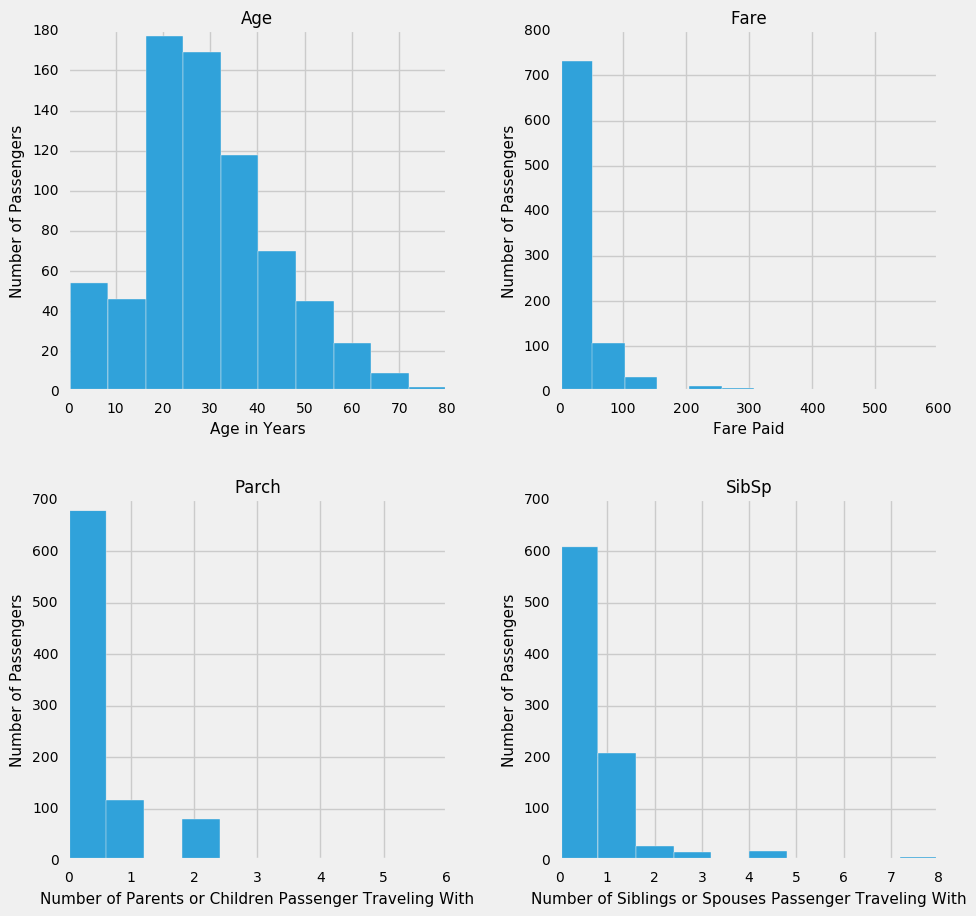

In [88]:
continuous_columns = ['Age','Fare','Parch', 'SibSp']
obj = data.filter(items=continuous_columns).hist(figsize=(10,10))

obj[0,0].set_xlabel('Age in Years')
obj[0,0].set_ylabel('Number of Passengers')

obj[0,1].set_xlabel('Fare Paid')
obj[0,1].set_ylabel('Number of Passengers')

obj[1,0].set_xlabel('Number of Parents or Children Passenger Traveling With')
obj[1,0].set_ylabel('Number of Passengers')

obj[1,1].set_xlabel('Number of Siblings or Spouses Passenger Traveling With')
obj[1,1].set_ylabel('Number of Passengers')


Already a couple of things jump out to me. In age we can see there were a lot of children under 10 years old on board. It seems most people paid fares in the lowest bracket, which is backed up by the distribution we see in the Pclass variable. Most people were traveling without family members on board.  
<p>Let's see what is average and then take a look at each one of these variables in more depth.</p>

<h3>The average passenger.</h3>

In [10]:
average_passenger = pd.DataFrame(data.mean()[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
average_passenger.columns = {'Average Passenger'}
average_passenger

,Average Passenger
Survived,0.383838
Pclass,2.308642
Age,29.699118
SibSp,0.523008
Parch,0.381594
Fare,32.204208


Gender breakdown of passengers.

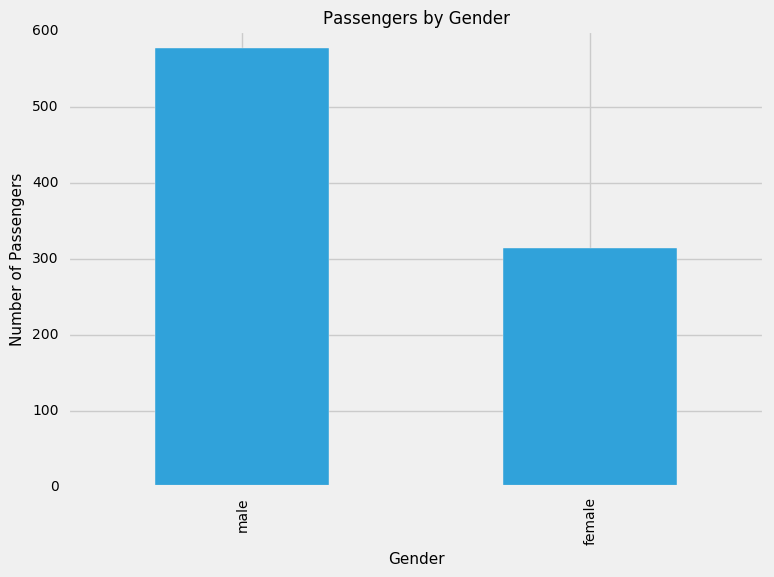

In [83]:
data['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Passengers by Gender')

<p>So our average passenger was 29 years old, middle class, and had paid £32.20 to board the Titanic.</p>
<p>And, unfortunately, he was about to be dead.</p> 

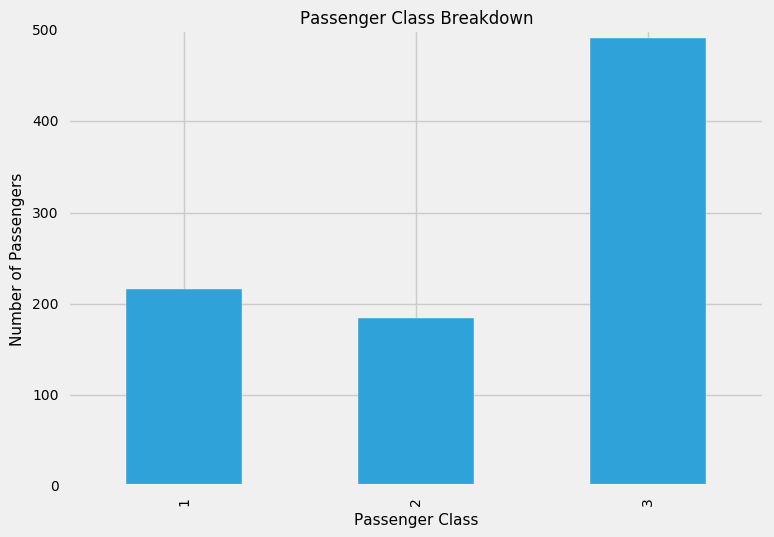

In [59]:
#What was the class breakdown?
data.groupby('Pclass')['PassengerId'].count().plot(kind='bar')
plt.title('Passenger Class Breakdown')
plt.ylabel('Number of Passengers')
plt.xlabel('Passenger Class')

It seems that a majority of people were in the lower class. 

Let's take a look at the age distribution.

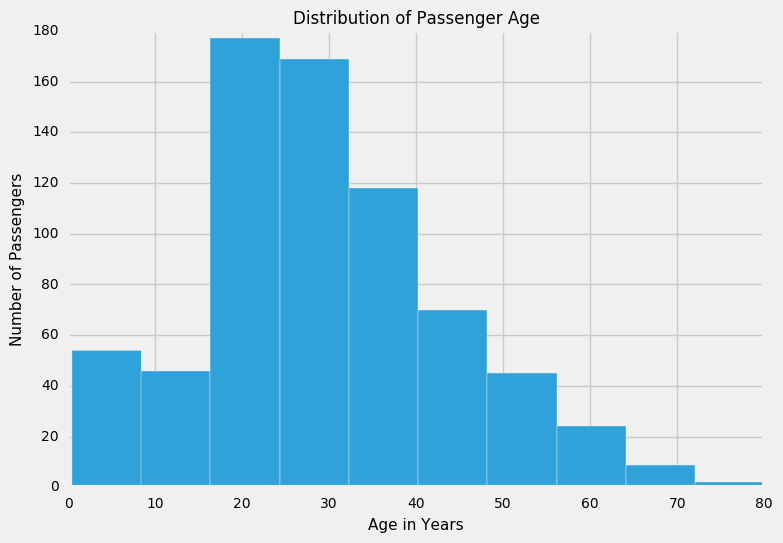

In [89]:
data.hist(column='Age')
plt.ylabel('Number of Passengers')
plt.xlabel('Age in Years')
plt.title('Distribution of Passenger Age')

As I mentioned before, it looks like there where a high number of children under ten. Most of the passengers seem to be between 20 and 40 years old.

How many people were traveling with Siblings/Spouses and Parents/Children?

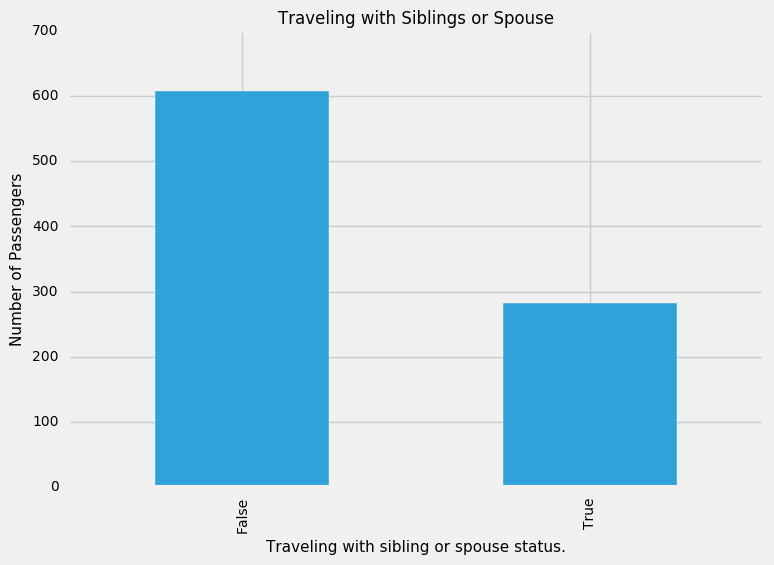

In [60]:
#Traveling with sibling or spouse.
has_sibling_spouse = data['SibSp'] > 0
has_sibling_spouse.value_counts().plot(kind='bar')
plt.title('Traveling with Siblings or Spouse')
plt.ylabel('Number of Passengers')
plt.xlabel('Traveling with sibling or spouse status.')

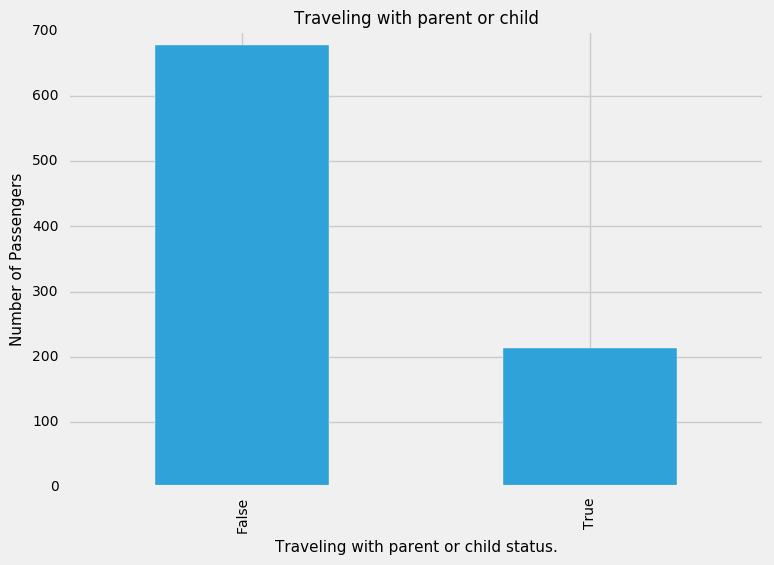

In [61]:
#Traveling with parent or child.
has_parent_child = data['Parch'] > 0 
has_parent_child.value_counts().plot(kind='bar')
plt.title('Traveling with parent or child')
plt.ylabel('Number of Passengers')
plt.xlabel('Traveling with parent or child status.')

Let's get a number for people traveling without relations on board.

In [16]:
#Traveling without relations. 
data[~has_sibling_spouse & ~has_parent_child]['PassengerId'].count()

537

<p>It seems that most people were traveling without relatives.</p> 
<p>A breakdown of fares will be analyzed later in the document.</p>
<p>Where people boarded:</p>

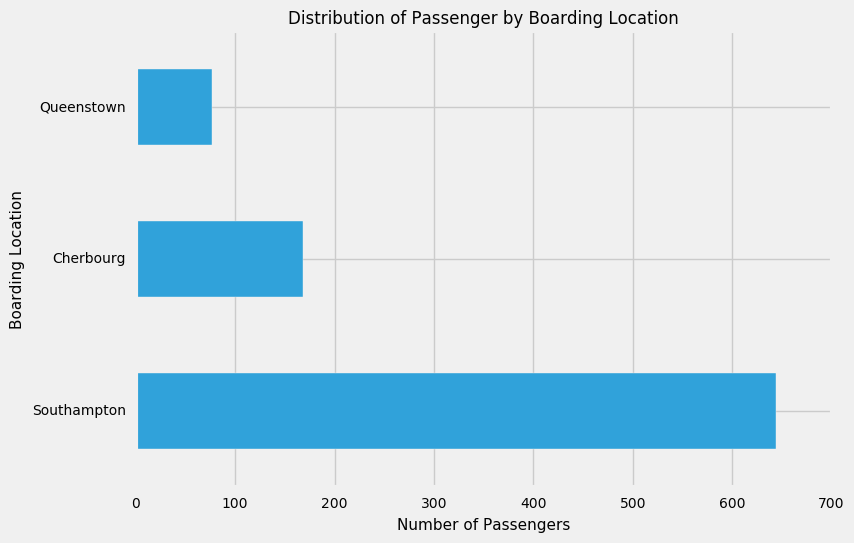

In [91]:
point_of_embarcation = pd.Series(data['Embarked'].value_counts())
point_of_embarcation.index = ['Southampton', 'Cherbourg', 'Queenstown']
point_of_embarcation.plot(kind='barh')
plt.ylabel('Boarding Location')
plt.xlabel('Number of Passengers')
plt.title('Distribution of Passenger by Boarding Location')

<h2>Survival</h2>

First, let's get a total number and percentage of survivors and perished.

Perished    549
Survived    342
Name: Survived, dtype: int64



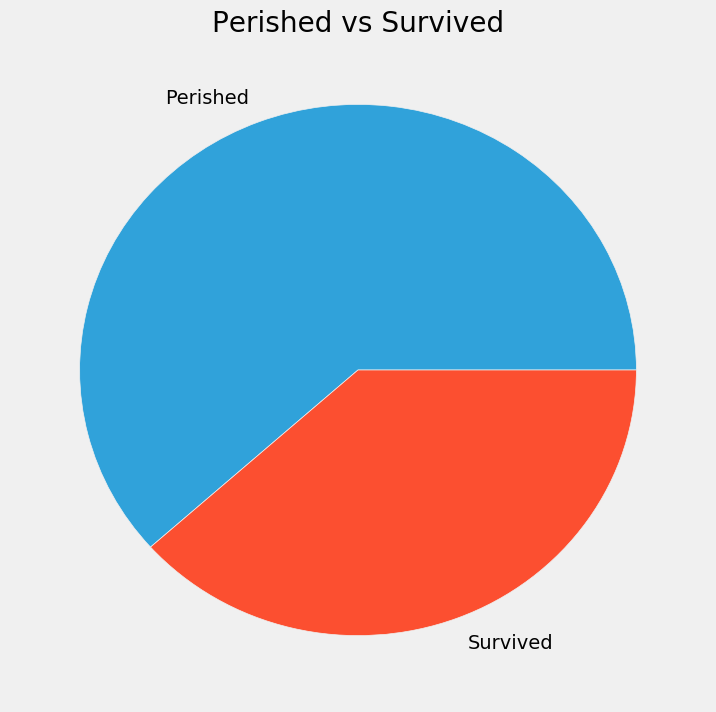

In [19]:
number_survived_perished = data['Survived'].value_counts()
number_survived_perished.index = ['Perished', 'Survived']
number_survived_perished.plot(kind='pie', figsize=(8,8))
plt.ylabel('')
plt.title('Perished vs Survived')

print number_survived_perished
print 

In [20]:
#What percentage of people survived
total_passengers = data['Survived'].count()
percent_perished = number_survived_perished / total_passengers * 100
percent_perished

Perished    61.616162
Survived    38.383838
Name: Survived, dtype: float64

Let's look at that as a bar chart.

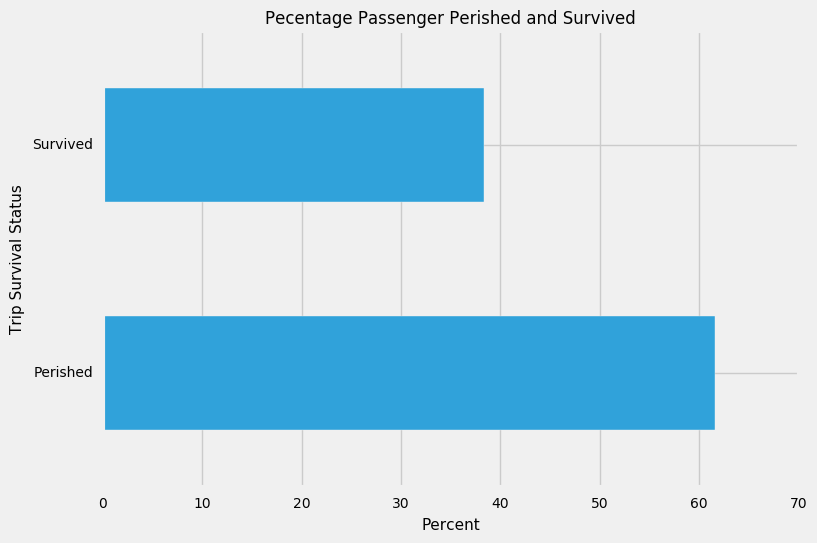

In [92]:
percent_perished.plot(kind='barh')
plt.title('Pecentage Passenger Perished and Survived')
plt.xlabel('Percent')
plt.ylabel('Trip Survival Status')

It seems that only 38.4% of passengers survived the tragedy.

Now let's compare the average perished to the average survivor to see if there are any significant differences.

In [22]:
average_perished = data[data['Survived'] == 0].mean()[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
average_survived = data[data['Survived'] == 1].mean()[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
average_perished_vs_survived = pd.concat([average_perished, average_survived],axis=1)
average_perished_vs_survived.columns = {'Perished', 'Survived'}
average_perished_vs_survived.loc[:,('Value Difference')] = average_perished_vs_survived['Perished'] - average_perished_vs_survived['Survived']
average_perished_vs_survived.loc[:,('Percent Difference')] = average_perished_vs_survived['Value Difference'] / average_perished_vs_survived['Survived'] * 100
average_perished_vs_survived

,Perished,Survived,Value Difference,Percent Difference
Pclass,2.531876,1.950292,0.581584,29.820336
Age,30.626179,28.343690,2.282490,8.052902
SibSp,0.553734,0.473684,0.080050,16.899413
Parch,0.329690,0.464912,-0.135222,-29.085473
Fare,22.117887,48.395408,-26.277521,-54.297550


It looks like the Titanic's survivors were, on average, of a higher class and paid a higher fare. 

What factors contributed with survival?

Let's see if anything jumps out at us from histograms comparing Survived to Perished values for each numeric column.

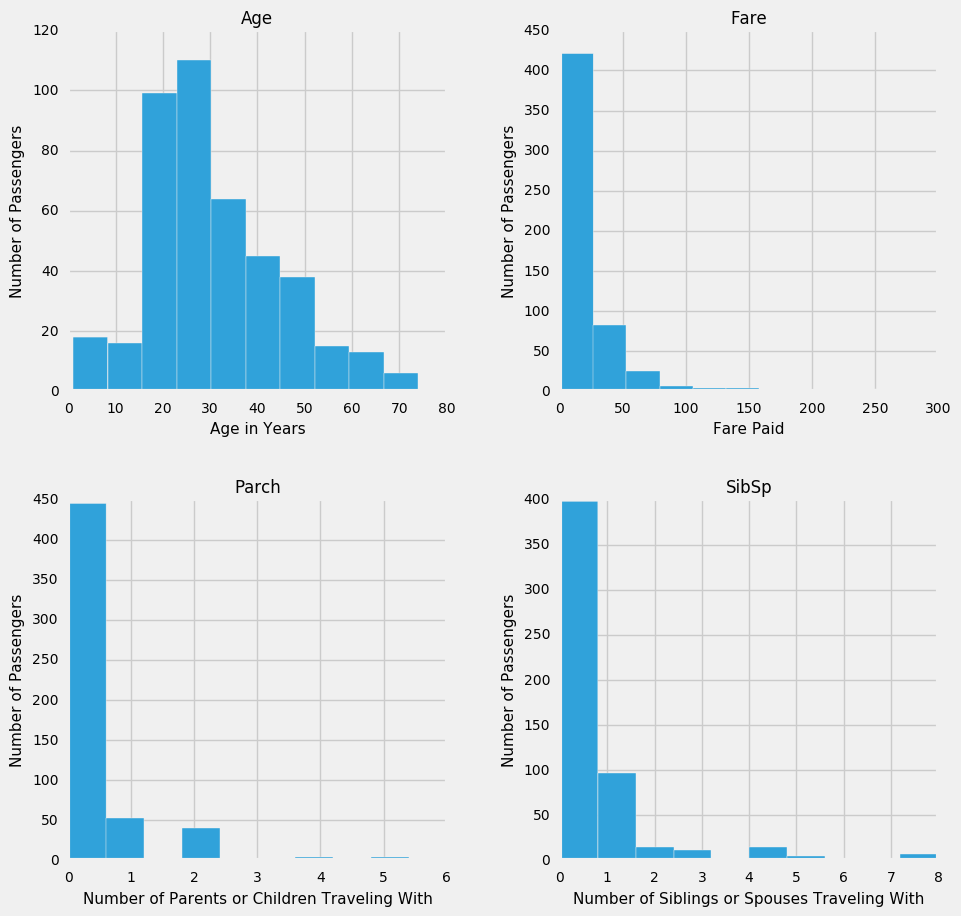

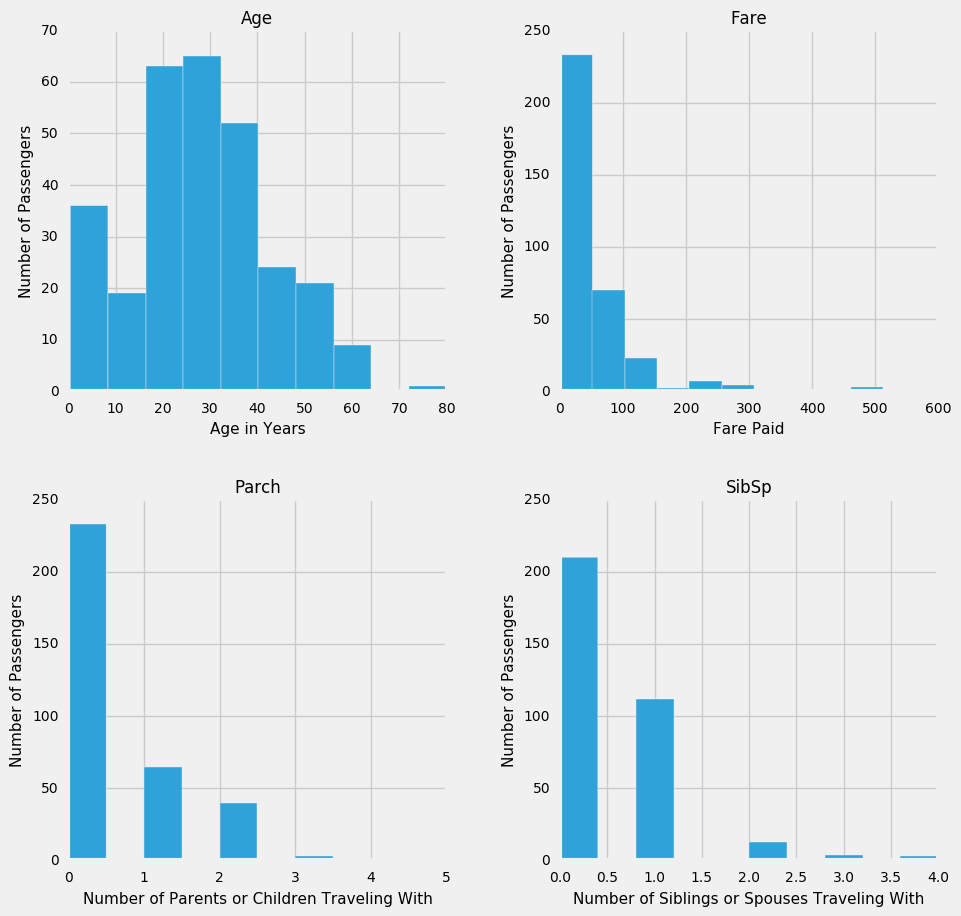

In [81]:
#fix text on histograms
#plt.style.use('seaborn-notebook')
#display perished and survived histograms
columns_of_interest = ['Age', 'Fare', 'Parch', 'SibSp', 'Survived']
obj = data.filter(items=columns_of_interest).groupby('Survived').hist(figsize=(10,10))

for x in [0,1]:
    obj[x][0,0].set_xlabel('Age in Years')
    obj[x][0,1].set_xlabel('Fare Paid')
    obj[x][1,0].set_xlabel('Number of Parents or Children Traveling With')
    obj[x][1,1].set_xlabel('Number of Siblings or Spouses Traveling With')
    
    obj[x][x,0].set_ylabel('Number of Passengers')
    obj[x][x,1].set_ylabel('Number of Passengers')
    obj[x][0,x].set_ylabel('Number of Passengers')
    obj[x][1,x].set_ylabel('Number of Passengers')

obj[0][1,1].set_ylabel('Number of Passengers')
obj[1][0,0].set_ylabel('Number of Passengers')

It looks like a high proportion of children under 10 survived. There is a blip in survivor fare where you can see the effects of some of the first class passengers surviving. The class makeup still seems to be the largest difference with many 1st class passengers surviving. Also there may be some correlation between survival and traveling with Parents/Children or Siblings/Spouses which we'll want to investigate.

By this point I feel like I have a pretty good handle on what I'm looking for, but I've seen <a href="http://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/">scatter matrix</a> recommended as a way to take a quick glance at the way all the variables interact.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cb22c90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fc85790>]], dtype=object)

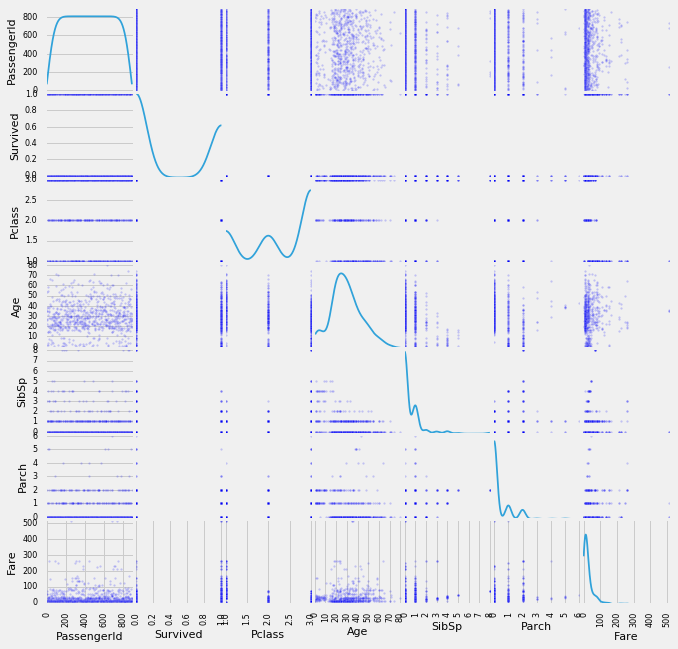

In [27]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=.2, figsize=(10,10), diagonal='kde')

In this case we see some of what we already know, but nothing I wasn't already planning to investigate. I notice here that young people tend to be traveling with Siblings and Parents, and that Ages are clustered around 25-30. 

<p>Let's graph the variable that jumps out as most highly correlated with living: your class.</p>

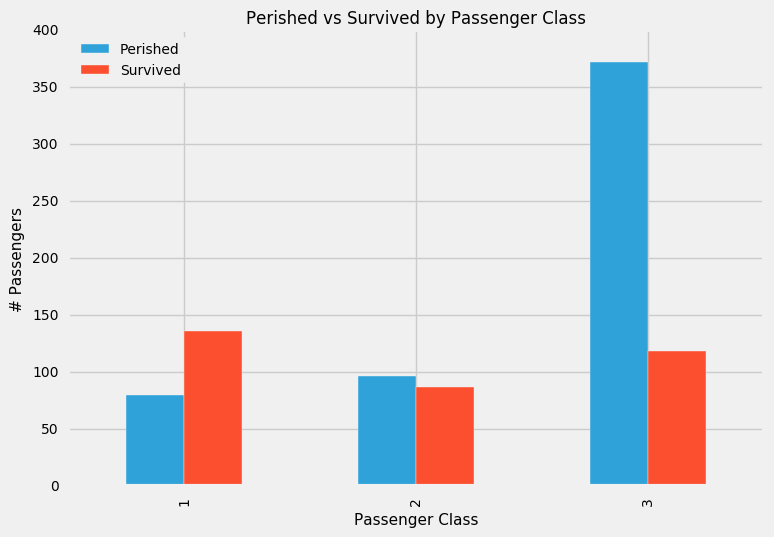

In [80]:
data.groupby(['Pclass', 'Survived'])[['PassengerId']].count().unstack().plot(kind='bar')
plt.ylabel('# Passengers')
plt.xlabel('Passenger Class')
plt.title('Perished vs Survived by Passenger Class')
plt.legend(['Perished','Survived'], loc=2)

It's easy to see there are big discrepancies between survivorship between classes. 


In [29]:
#Add Total and Percent Lived to Dataframe.
survival_by_class.loc[:,('Total')] = survival_by_class.Lived + survival_by_class.Died
survival_by_class.loc[:,('Percent Lived')] = survival_by_class.Lived / survival_by_class.Total * 100
survival_by_class

,Lived,Died,Total,Percent Lived
Pclass,,,,
1,136,80,216,62.962963
2,87,97,184,47.282609
3,119,372,491,24.236253


Less than a quarter of the third class passengers lived, while well over half of the first class passengers survived.

Taking a closer look at comparing the ages of perished vs ages of survivors.

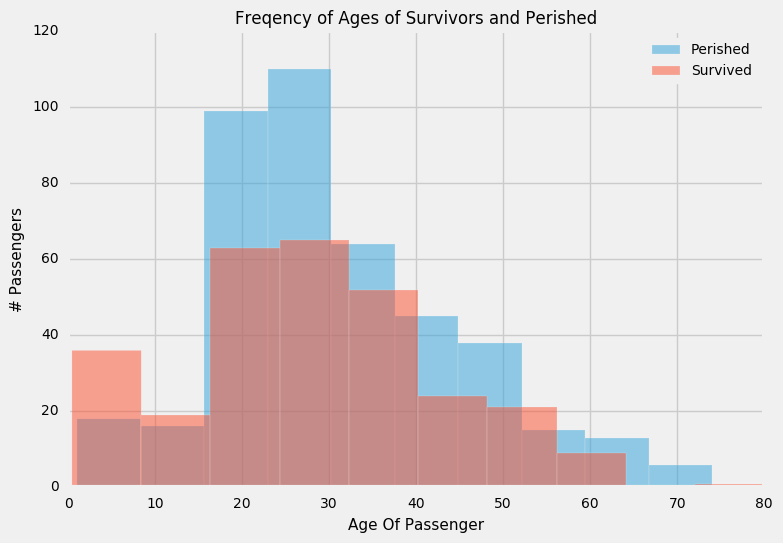

In [89]:
data.groupby('Survived').Age.plot(kind='hist',alpha=.5)
plt.ylabel('# Passengers')
plt.xlabel('Age Of Passenger')
plt.title('Freqency of Ages of Survivors and Perished')
plt.legend(['Perished','Survived'], loc=1)

The Survived plot is shorter because less people survived. The thing that jumps out immediatly is that there is a spike in the 0-10 category in the 'Survived' chart, hopefully indicating that children were given preferential treatment.
<p>Let's plot the fares of the perished against the fares of survivors in the same way.</p>

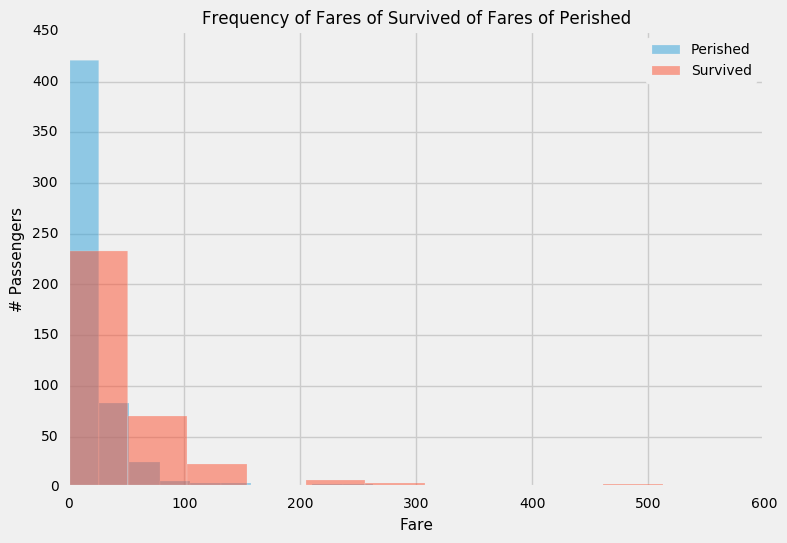

In [28]:
#Fares of survived vs fares of perished
data.groupby('Survived').Fare.plot(kind='hist',alpha=.5)
plt.ylabel('# Passengers')
plt.xlabel('Fare')
plt.title('Frequency of Fares of Survived of Fares of Perished')
plt.legend(['Perished','Survived'], loc=1)

This graph doesn't highlight the fact well, but as we saw earlier from the comparison of the average fare of a survivor to the average fare of someone who perished, most of the survivors paid more, which makes sense since many of the 1st class passengers lived.
<p>This will be furth investigated in a scatterplot in the final section.<p>

<h3>Gender</h3>
<p>Let's see if gender had any influence on survival.</p>

In [32]:
#Pull survival information by gender, return a series.
def gender_survival(gender):
    is_gender = data['Sex'] == gender
    number_of_gender = data[is_gender]['PassengerId'].count()
    gender_survived = data[is_gender & is_survived]['PassengerId'].count()
    gender_perished = data[is_gender & ~is_survived]['PassengerId'].count()
    percent_gender_survived = gender_survived / (gender_survived + float(gender_perished)) * 100
    gender_survival_info = pd.Series([number_of_gender, gender_survived, gender_perished, percent_gender_survived])
    return gender_survival_info

#Create series for each dataframe.
male_survival = gender_survival('male')
female_survival = gender_survival('female')

#Create a dataframe with both Genders
gender_survival_df = pd.concat([male_survival, female_survival], axis=1)
gender_survival_df.columns = {'Male', 'Female'}
gender_survival_df.index = ['Number Passengers','Survived','Perished','Percent Survived']
gender_survival_df = gender_survival_df.T
gender_survival_df

,Number Passengers,Survived,Perished,Percent Survived
Male,577.0,109.0,468.0,18.890815
Female,314.0,233.0,81.0,74.203822


<p>Wow. Gender seems to correlate even higher than class. 74.2% of the women survived, compared to 18.9% of the men.</p>
From reading background information I know there was a <a href="https://en.wikipedia.org/wiki/Women_and_children_first">'Women and Children First" protocol</a> for loading lifeboats. Let's see if that's represented in our data. We'll define child as 10 years old or under.

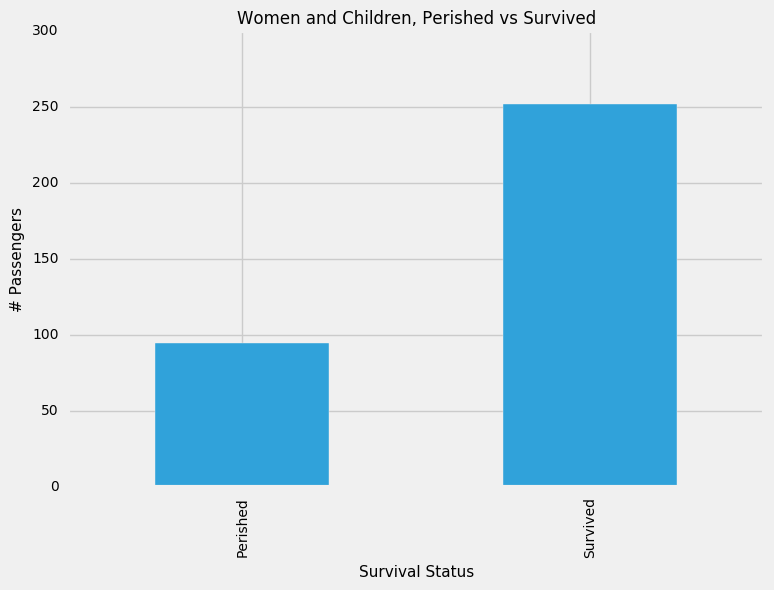

In [101]:
is_female = data['Sex'] == 'female'
is_child = data['Age'] <= 10 

women_and_children = data[is_female | is_child].groupby('Survived')['PassengerId'].count()
plot = women_and_children.plot(kind='bar')

plt.ylabel('# Passengers')
plt.xlabel('Survival Status')
plot.set_xticklabels(['Perished','Survived'])
plt.title('Women and Children, Perished vs Survived')

In [34]:
women_and_children / women_and_children.sum() * 100

Survived
0    27.377522
1    72.622478
Name: PassengerId, dtype: float64

72.6% of passengers who were a woman or a child survived.
<p>Does being an upper class woman or child still increase your chances of making it out alive?</p>

[<matplotlib.text.Text at 0x249fbe80>, <matplotlib.text.Text at 0x27b16c88>]

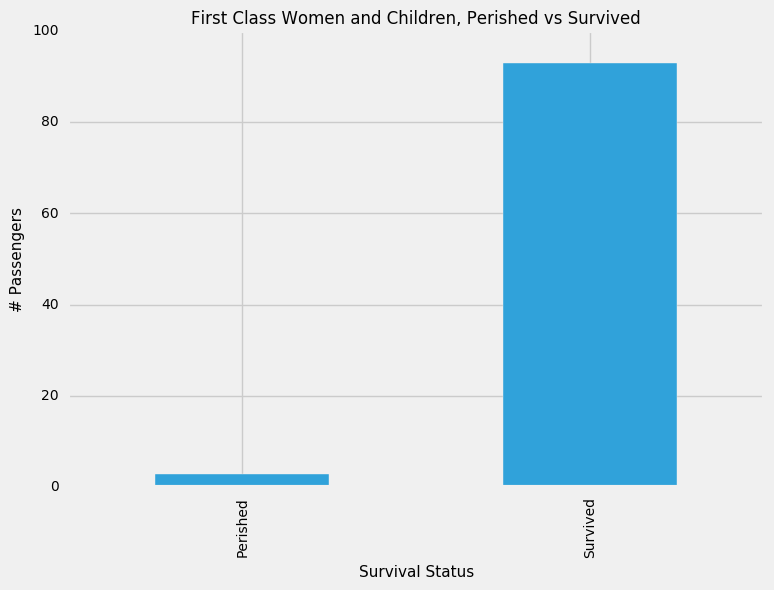

In [100]:
is_first_class = data['Pclass'] == 1
first_class_women_and_children  = data[(is_female | is_child) & is_first_class]
plot = first_class_women_and_children.groupby('Survived')['PassengerId'].count().plot(kind='bar')

plt.ylabel('# Passengers')
plt.xlabel('Survival Status')
plt.title('First Class Women and Children, Perished vs Survived')
plot.set_xticklabels(['Perished','Survived'])

In [36]:
first_class_women_and_children.groupby('Survived')['PassengerId'].count() / first_class_women_and_children.groupby('Survived').count().sum()['PassengerId'] * 100

Survived
0     3.125
1    96.875
Name: PassengerId, dtype: float64

That's a resounding yes. 96.9% of the first class women and children survived.

What percent of passengers traveling with Siblings or Spouses survived?

In [37]:
data[has_sibling_spouse & is_survived]['PassengerId'].count() / float(data[has_sibling_spouse]['PassengerId'].count()) * 100

46.64310954063604

Only 38% of the general population survived, and this is higher than that. I am not
certain if it is statistically relevant, and it also could be that more 1st class passengers traveled with family. 
<p>What pecentage of passenger traveling with Parents or Children survived?</p>

In [38]:
data[has_parent_child & is_survived]['PassengerId'].count() / float(data[has_parent_child]['PassengerId'].count()) * 100

51.173708920187785

That's even higher than the total population's survival rate. I wonder what percentage of people traveling alone survived.

In [39]:
traveling_alone = data[~has_sibling_spouse & ~has_parent_child]
traveling_alone[traveling_alone['Survived'] == 1]['PassengerId'].count() / float(traveling_alone['PassengerId'].count()) * 100

30.353817504655495

Only 30.4%, which is lower than the total population's survival rate. Looks like it may be possible that traveling with someone instead of traveling alone made it more likely you were going to live. However, it is also possible that there are biases here that should be investigated. Were the rich more likely to travel with family? Were siblings and people traveling with their parents more likely to be women or children?

According to http://www.keyflux.com/titanic/facts.htm the Titanic had 840 Staterooms, 416 1st class rooms, 162 second class rooms, 262 third class rooms plus another 40 open birthing areas.

Let's investigate if what deck your cabin was on influenced the probability of your survival. Using the cabin information I'll measure survivorship by deck, missing the cabin named 'T' and supposing the cabins named things like F E69 are on the deck level of the first letter.

In [30]:
data[data['Cabin'].isnull()].count()
#687 of our passengers don't have cabin information
has_cabin = data[data['Cabin'].notnull()]


#Survivorship by deck. 
def investigate_by_deck(deck_name):
    if deck_name != 'None':
        passengers_on_deck_df = has_cabin[has_cabin['Cabin'].str.startswith(deck_name)]
    elif deck_name == 'None':
        passengers_on_deck_df = data[data['Cabin'].isnull()]
    number_of_passengers_on_deck = passengers_on_deck_df['PassengerId'].count()
    survivors_on_deck = passengers_on_deck_df[passengers_on_deck_df['Survived'] == 1]['PassengerId'].count()
    perished_on_deck = passengers_on_deck_df[passengers_on_deck_df['Survived'] == 0]['PassengerId'].count()
    percent_survived = survivors_on_deck / float(number_of_passengers_on_deck) * 100
    average_class = passengers_on_deck_df['Pclass'].mean()
    percent_male = passengers_on_deck_df[passengers_on_deck_df['Sex'] == 'male']['PassengerId'].count() / float(number_of_passengers_on_deck) * 100
    percent_female = passengers_on_deck_df[passengers_on_deck_df['Sex'] == 'female']['PassengerId'].count() / float(number_of_passengers_on_deck) * 100
    average_age = passengers_on_deck_df['Age'].mean()
    average_fare = passengers_on_deck_df['Fare'].mean()
    max_fare = passengers_on_deck_df['Fare'].max()
    min_fare = passengers_on_deck_df['Fare'].min()
    deck_series = pd.Series([deck_name, number_of_passengers_on_deck, survivors_on_deck, perished_on_deck,
                       percent_survived, average_class, percent_male, percent_female, average_age,
                       average_fare, min_fare, max_fare])
    deck_series.index = ['Deck', 'Number of Passengers', 'Survivors', 'Perished', 'Percent Survived',
                    'Average Class', 'Percent Male', 'Percent Female', 'Average Age',
                    'Average Fare', 'Minimum Fare', 'Max Fare']
    return deck_series



deck_A = investigate_by_deck('A')
deck_B = investigate_by_deck('B')
deck_C = investigate_by_deck('C')
deck_D = investigate_by_deck('D')
deck_E = investigate_by_deck('E')
deck_F = investigate_by_deck('F')
deck_G = investigate_by_deck('G')
deck_None = investigate_by_deck('None')

decks_df = pd.concat([deck_A, deck_B, deck_C, deck_D, deck_E, deck_F, deck_G, deck_None], axis=1)
decks_df = decks_df.T
decks_df.set_index('Deck', inplace=True)
decks_df


,Number of Passengers,Survivors,Perished,Percent Survived,Average Class,Percent Male,Percent Female,Average Age,Average Fare,Minimum Fare,Max Fare
Deck,,,,,,,,,,,
A,15,7,8,46.6667,1,93.3333,6.66667,44.8333,39.6239,0,81.8583
B,47,35,12,74.4681,1,42.5532,57.4468,34.9556,113.506,0,512.329
C,59,35,24,59.322,1,54.2373,45.7627,36.0867,100.151,26.55,263
D,33,25,8,75.7576,1.12121,45.4545,54.5455,39.0323,57.2446,12.875,113.275
E,32,24,8,75,1.3125,53.125,46.875,38.1167,46.0267,8.05,134.5
F,13,8,5,61.5385,2.38462,61.5385,38.4615,19.9545,18.6968,7.65,39
G,4,2,2,50,3,0,100,14.75,13.5813,10.4625,16.7
None,687,206,481,29.9854,2.63901,68.4134,31.5866,27.5553,19.1573,0,512.329


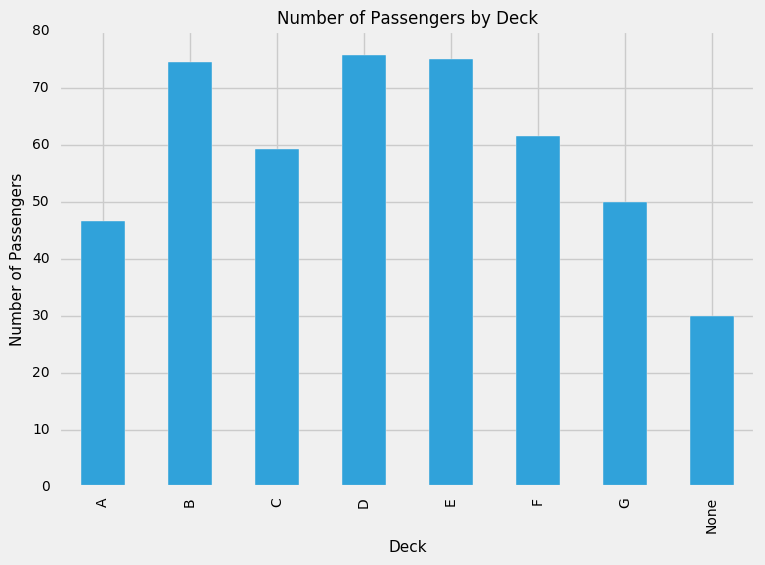

In [32]:
decks_df['Percent Survived'].plot(kind='bar')
plt.title('Number of Passengers by Deck')
plt.ylabel('Number of Passengers')

It seems that potentially the real difference here is having a cabin versus not having one. 

Did people who boarded at a certain place tend to survive?

In [102]:
data.groupby('Embarked')['PassengerId'].count()
data.groupby('Embarked')['Survived'].sum()

survival_by_embarkation = pd.concat([data.groupby('Embarked')['PassengerId'].count(),
                                    data.groupby('Embarked')['Survived'].sum()], axis=1)
survival_by_embarkation.index = ['Cherbourg', 'Queenstown', 'Southampton']
survival_by_embarkation.columns = ['Passengers', 'Survived']


survival_by_embarkation.loc[:,('Perished')] = survival_by_embarkation['Passengers'] - survival_by_embarkation['Survived']
survival_by_embarkation.loc[:,('Percent Survived')] = survival_by_embarkation['Survived'] / survival_by_embarkation['Passengers'] * 100 

survival_by_embarkation

,Passengers,Survived,Perished,Percent Survived
Cherbourg,168,93,75,55.357143
Queenstown,77,30,47,38.961039
Southampton,644,217,427,33.695652


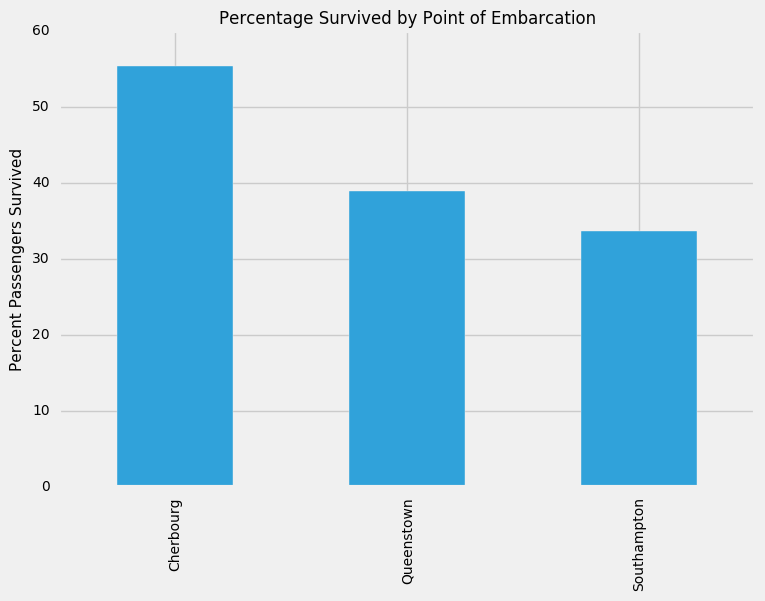

In [104]:
survival_by_embarkation['Percent Survived'].plot(kind='bar')
plt.ylabel('Percent Passengers Survived')
plt.title('Percentage Survived by Point of Embarcation')

I doubt that boarding at Cherbourg magically makes you more likely to live, so let's investigate for other factors that might have influenced this chart.

In [44]:
data.groupby('Embarked').describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Age        Fare       Parch  PassengerId      Pclass  \
Embarked                                                                      
C        count  130.000000  168.000000  168.000000   168.000000  168.000000   
         mean    30.814769   59.954144    0.363095   445.357143    1.886905   
         std     15.434860   83.912994    0.660481   259.454201    0.944100   
         min      0.420000    4.012500    0.000000     2.000000    1.000000   
         25%           NaN   13.697950    0.000000   235.500000    1.000000   
         50%           NaN   29.700000    0.000000   455.000000    1.000000   
         75%           NaN   78.500025    1.000000   651.000000    3.000000   
         max     71.000000  512.329200    3.000000   890.000000    3.000000   
Q        count   28.000000   77.000000   77.000000    77.000000   77.000000   
         mean    28.089286   13.276030    0.168831   417.896104    2.909091   
         std     16.915396   14.188047    0.656999   253.646282    0.369274   
         min      2.000000    6.750000    0.000000     6.000000    1.000000   
         25%           NaN    7.750000    0.000000   209.000000    3.000000   
         50%           NaN    7.750000    0.000000   389.000000    3.000000   
         75%           NaN   15.500000    0.000000   630.000000    3.000000   
         max     70.500000   90.000000    5.000000   891.000000    3.000000   
S        count  554.000000  644.000000  644.000000   644.000000  644.000000   
         mean    29.445397   27.079812    0.413043   449.527950    2.350932   
         std     14.143192   35.887993    0.853253   256.942044    0.789402   
         min      0.670000    0.000000    0.000000     1.000000    1.000000   
         25%           NaN    8.050000    0.000000   225.750000    2.000000   
         50%           NaN   13.000000    0.000000   447.500000    3.000000   
         75%           NaN   27.900000    0.000000   673.250000    3.000000   
         max     80.000000  263.000000    6.000000   889.000000    3.000000   

                     SibSp    Survived  
Embarked                                
C        count  168.000000  168.000000  
         mean     0.386905    0.553571  
         std      0.557213    0.498608  
         min      0.000000    0.000000  
         25%      0.000000    0.000000  
         50%      0.000000    1.000000  
         75%      1.000000    1.000000  
         max      2.000000    1.000000  
Q        count   77.000000   77.000000  
         mean     0.428571    0.389610  
         std      0.979105    0.490860  
         min      0.000000    0.000000  
         25%      0.000000    0.000000  
         50%      0.000000    0.000000  
         75%      0.000000    1.000000  
         max      4.000000    1.000000  
S        count  644.000000  644.000000  
         mean     0.571429    0.336957  
         std      1.216600    0.473037  
         min      0.000000    0.000000  
         25%      0.000000    0.000000  
         50%      0.000000    0.000000  
         75%      1.000000    1.000000  
         max      8.000000    1.000000

As I suspected, people who boarded in Cherbourg had a higher mean fare and a higher mean class than the other two boarding areas. This accounts for why more people who boarded there survived the accident.

<h2>Fares and Miscellaneous</h2>

First let's zoom in on the fares paid.

In [45]:
#General description.
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [46]:
#How much did the Titanic collect in fares?
data['Fare'].cumsum()[-1:]

890    28693.9493
Name: Fare, dtype: float64

Visualize fares by class.

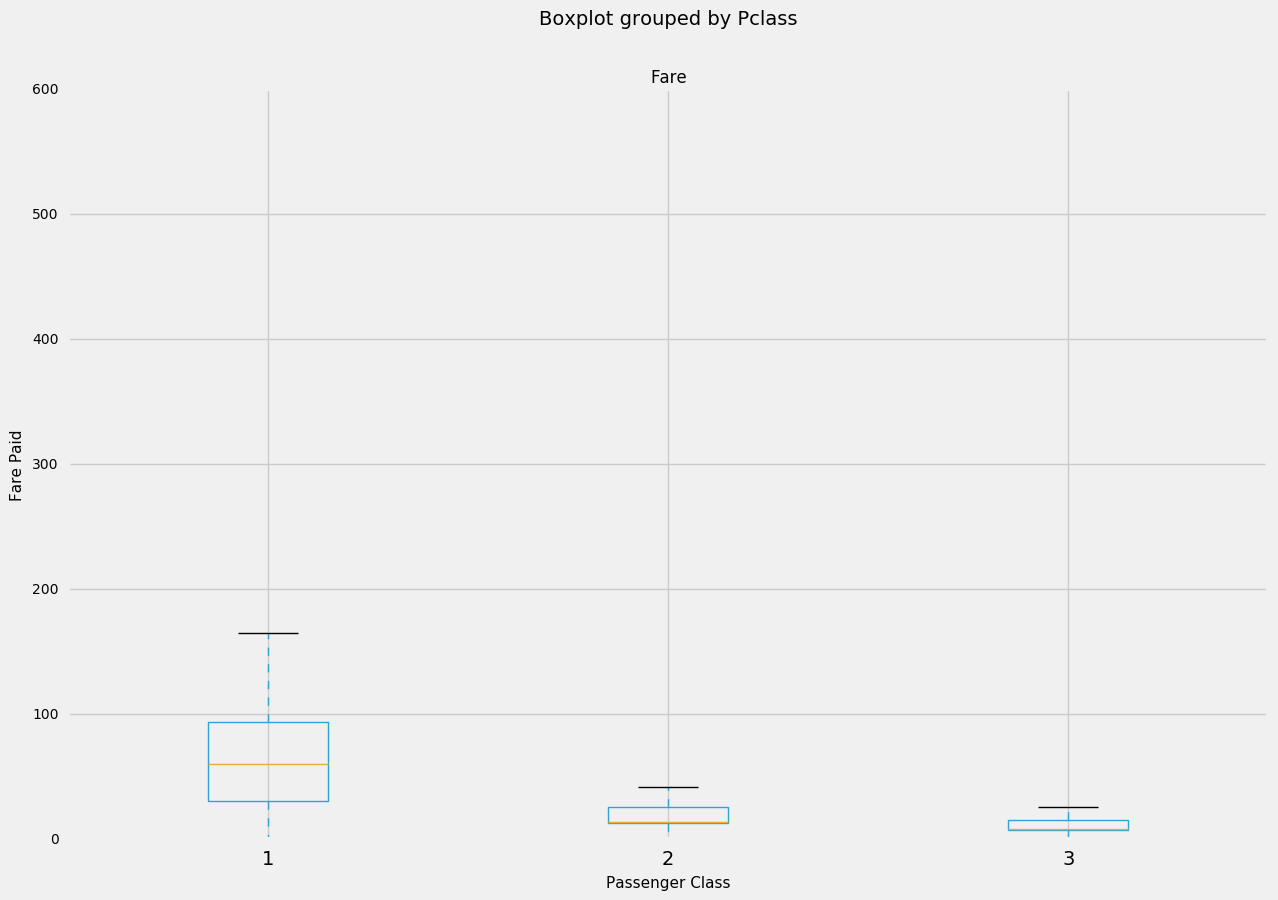

In [26]:
data.boxplot('Fare', by='Pclass', figsize=(15,10))
plt.ylabel('Fare Paid')
plt.xlabel('Passenger Class')

Oof, that's rough. Let's see it as text.

In [48]:
data_grouped_by_class = data.groupby('Pclass')
data_grouped_by_class[['Fare']].describe()

Fare
Pclass                  
1      count  216.000000
       mean    84.154687
       std     78.380373
       min      0.000000
       25%     30.923950
       50%     60.287500
       75%     93.500000
       max    512.329200
2      count  184.000000
       mean    20.662183
       std     13.417399
       min      0.000000
       25%     13.000000
       50%     14.250000
       75%     26.000000
       max     73.500000
3      count  491.000000
       mean    13.675550
       std     11.778142
       min      0.000000
       25%      7.750000
       50%      8.050000
       75%     15.500000
       max     69.550000

Let's see if we can fix the box plot by removing the free fares and the max for each class and adjusting the axis of the chart.

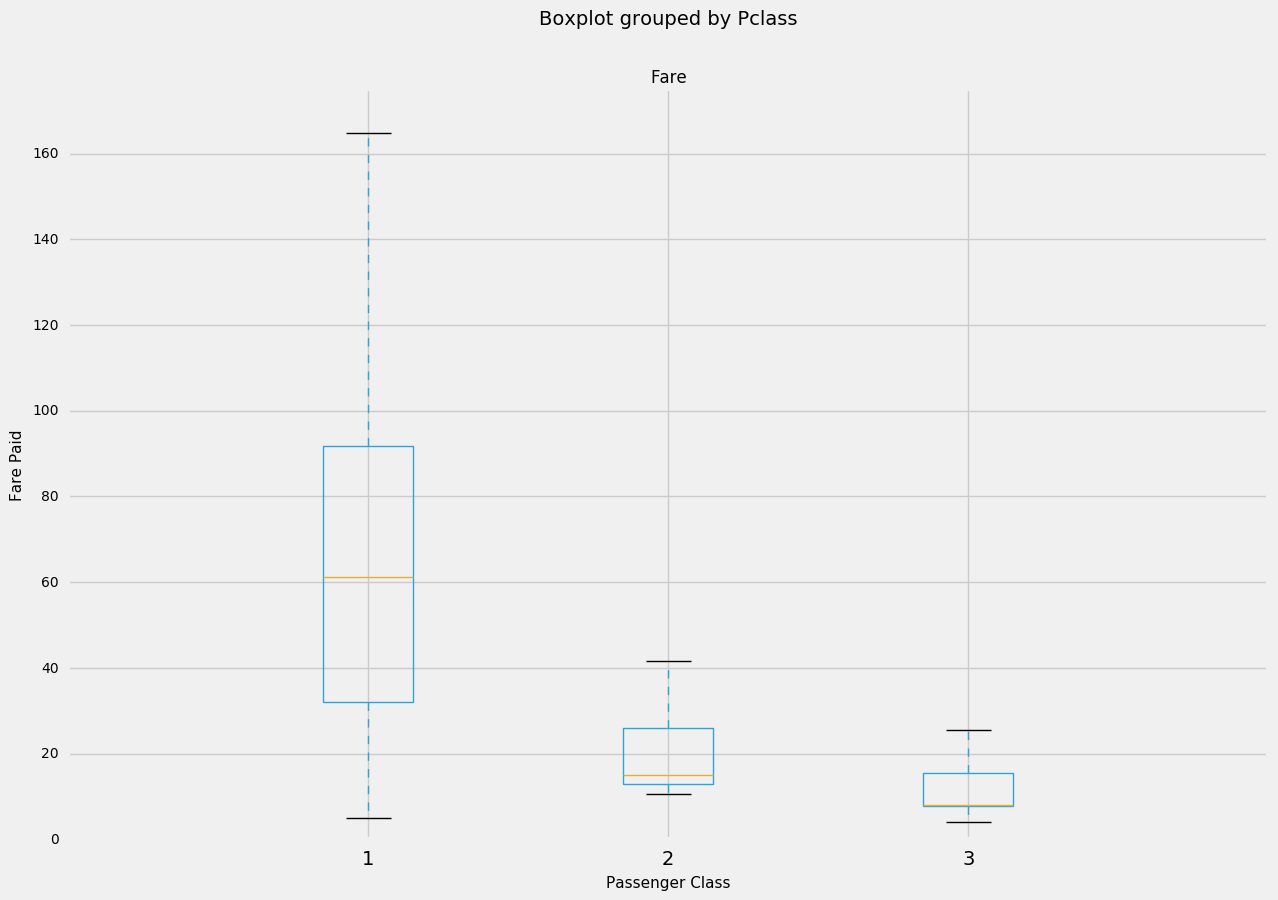

In [27]:
free_trip = data['Fare'] == 0
max_outlier = data['Fare'] == data['Fare'].max()
data[~free_trip & ~max_outlier].boxplot('Fare', by='Pclass',figsize=(15,10))
plt.axis([0,4,0,175])
plt.ylabel('Fare Paid')
plt.xlabel('Passenger Class')

Much better.

What was the highest fare and who paid it?

In [62]:
data[data['Fare'] == data['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


It looks like perhaps the fare data is pulled from the ticket price, and since these three people share a ticket it seems like their fare is high, but really it should be divided by 3 (which is still a relatively high fare, but not the highest.)
<p>Who has the highest fare on a non-shared ticket?</p>

In [63]:
data[data['Fare'] == data['Fare'].value_counts().sort_index().index[-6]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S


Aha! It seems <b>Mr. John Farthing</b> is actually the passenger that paid the most for his voyage at a whopping £221.78.

Who paid the lowest fares and lived?

In [64]:
data.iloc[data['Fare'][is_survived].sort_values()[:3].index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S


What was the most common surname among the passengers?

In [65]:
all_names = data['Name']

In [66]:
last_names = all_names.str.split(',').str.get(0)
last_names.value_counts()[:10]

Andersson     9
Sage          7
Carter        6
Goodwin       6
Skoog         6
Panula        6
Johnson       6
Rice          5
Lefebre       4
Gustafsson    4
Name: Name, dtype: int64

Andersson, followed by Sage. Let's see if they were all in the same family.

In [67]:
data[data['Name'].str.contains('Andersson')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S


Seems like many were, but not all.  

## Limitations

One of the first thing I noticed when I started this exploration was that this dataset is not *all* of the passengers of the Titanic (there were 2,222 people on board, including crew). There are only 891 passengers described in this dataset. It doesn't include the people who manned the ship, which would be interesting to explore. I would also be interested in a variable that describes *how* a person survived. Were they on a lifeboat, or were they rescued from sea?  

I think that, given the entire passenger set, most of our findings here would hold up, but I also wonder if this dataset oversampled any of the populations from the ship (i.e. are there more first class passengers in this dataset than the overall population skewing our results?) Also, though you can see who is traveling with a parent, sibling, spouse, or child, there is no variable to describe who belong to what family group.

<h2>Conclusions</h2>
<p>My findings through this exploration are tentative, but there are several factors that seem
highly correlated with survival. Namely, class, gender, and being below a certain age. There are several other factors that bear more exploration, with results potentially skewed by other variables. For example, people who had cabins were more likely to survive than those without, but they were also more likely to be upper class.<p> 

<p>One of the things I like about this exploration is that it highlights what is knowable from the data and what is hard to understand without knowledge of the wreck. Were 1st class passengers conveniently closer to the lifeboats when the ship hit an iceberg in the middle of the night or, were the lower classes barred from safety? Were men gallant in allowing women and children to board first or were they held off at gunpoint by the crew? The data tells a story, but not the whole story, which is something I will take with me into other data explorations.</p>
